In [ ]:
# import pandas as pd

# # Load the Excel file
# file_path = "Moringa_NCWSC_Dataset.xlsx"
# xls = pd.ExcelFile(file_path)

# # Read all sheets into a dictionary of DataFrames
# dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# # Combine them into one big dataset (stacked)
# combined_df = pd.concat(dfs.values(), ignore_index=True)

# # Save once as CSV (faster to reload later)
# combined_df.to_csv("Moringa_NCWSC_Dataset.csv", index=False)

# print("✅ Dataset saved as CSV")
# print(combined_df.head())


✅ Dataset saved as CSV
      REGION                   ZONE             SUB_ZONE CVSTALLATION_KEY  \
0  DAGORETTI    KILIMANI-KILELESHWA           HURLINGHAM       CV-7000001   
1    CENTRAL              KAMUKUNJI            EASTLEIGH       CV-7000002   
2    CENTRAL              KAMUKUNJI            EASTLEIGH       CV-7000003   
3    CENTRAL              KAMUKUNJI  MOI AIR BASE_BAHATI       CV-7000004   
4    LANGATA  SOUTH C- NAIROBI WEST   SOUTH C_MOMBASA RD       CV-7000005   

  INST_TYPE_CODE INSTALLATION_TYPE_DESC            ACTIVITY_TYPE_INS  \
0            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   
1            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   
2            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   
3            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   
4            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   

   METER_SIZE            BILL_DATE BILL_ESTIMATE_ACTUAL  ...  \
0         0.5  20

In [44]:
combined_df = pd.read_csv("Moringa_NCWSC_Dataset.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_31944\1020726274.py:1: DtypeWarning: Columns (0,1,2,3,6,10,17,19,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv("Moringa_NCWSC_Dataset.csv")


In [45]:
print(combined_df.head())


      REGION                   ZONE             SUB_ZONE CVSTALLATION_KEY  \
0  DAGORETTI    KILIMANI-KILELESHWA           HURLINGHAM       CV-7000001   
1    CENTRAL              KAMUKUNJI            EASTLEIGH       CV-7000002   
2    CENTRAL              KAMUKUNJI            EASTLEIGH       CV-7000003   
3    CENTRAL              KAMUKUNJI  MOI AIR BASE_BAHATI       CV-7000004   
4    LANGATA  SOUTH C- NAIROBI WEST   SOUTH C_MOMBASA RD       CV-7000005   

  INST_TYPE_CODE INSTALLATION_TYPE_DESC            ACTIVITY_TYPE_INS  \
0            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   
1            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   
2            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   
3            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   
4            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   

   METER_SIZE            BILL_DATE BILL_ESTIMATE_ACTUAL  ...  \
0         0.5  2024-08-09 00:00:00      

In [46]:
# List all sheet names
print(xls.sheet_names)


['AUGUST_2024', 'SEP_2024', 'OCT_2024', 'NOV_2024', 'DEC_2024', 'JAN_2025', 'FEB_2025', 'MAR_2025', 'APR_2025', 'MAY_2025']


### After manually checking on the excell file i found that some colums were present on some sheets and absent on others and also some were named differently on others 
### Also found duplicated column names but found out the difference was that some has spaces in the names while others did not have 
### This shows and explains the NANs shown from the first output

In [14]:
# Column mapping for renaming
column_mapping = {
    "CVSTALLATION_KEY": "INSTALLATION_KEY",
    "REGION_AD": "REGION",
    "ZONE_AD": "ZONE",
    "SUB_ZONE_AD": "SUB_ZONE"
}

# Read and clean all sheets
dfs = []
for sheet in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Strip whitespace from column names
    df.columns = df.columns.str.strip()
    # Standardize column names
    df = df.rename(columns=column_mapping)
    dfs.append(df)

# Merge all sheets, keeping all columns
combined_df = pd.concat(dfs, ignore_index=True, sort=False)

print("Final shape:", combined_df.shape)
print("Columns:", combined_df.columns.tolist())
print(combined_df.head())


Final shape: (2464244, 20)
Columns: ['REGION', 'ZONE', 'SUB_ZONE', 'INSTALLATION_KEY', 'INST_TYPE_CODE', 'INSTALLATION_TYPE_DESC', 'ACTIVITY_TYPE_INS', 'METER_SIZE', 'BILL_DATE', 'BILL_ESTIMATE_ACTUAL', 'BILL_VALID_INVALID', 'MAIN_SERVICE', 'SHADOW_SERVICE', 'WATER_AMOUNT', 'SEWER_AMOUNT', 'BILL_AMOUNT', 'BILL_VOLUME', 'METER_RENT_AMOUNT', 'ADDRESS', 'BILL_DAYS']
      REGION                   ZONE             SUB_ZONE INSTALLATION_KEY  \
0  DAGORETTI    KILIMANI-KILELESHWA           HURLINGHAM       CV-7000001   
1    CENTRAL              KAMUKUNJI            EASTLEIGH       CV-7000002   
2    CENTRAL              KAMUKUNJI            EASTLEIGH       CV-7000003   
3    CENTRAL              KAMUKUNJI  MOI AIR BASE_BAHATI       CV-7000004   
4    LANGATA  SOUTH C- NAIROBI WEST   SOUTH C_MOMBASA RD       CV-7000005   

  INST_TYPE_CODE INSTALLATION_TYPE_DESC            ACTIVITY_TYPE_INS  \
0            DOM               DOMESTIC  NORMAL SINGLE-DWELLING UNIT   
1            DOM           

### - With the above now we have managed to combine all colums from all sheets

### -  Data summary: shapes, types, missing values 

In [47]:
# Shape of the dataset
print("Rows, Columns:", combined_df.shape)

# Data types and non-null values
combined_df.info()

# Summary stats for numerical columns
combined_df.describe()

Rows, Columns: (2464244, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464244 entries, 0 to 2464243
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   REGION                  object 
 1   ZONE                    object 
 2   SUB_ZONE                object 
 3   CVSTALLATION_KEY        object 
 4   INST_TYPE_CODE          object 
 5   INSTALLATION_TYPE_DESC  object 
 6   ACTIVITY_TYPE_INS       object 
 7   METER_SIZE              float64
 8   BILL_DATE               object 
 9   BILL_ESTIMATE_ACTUAL    object 
 10  BILL_VALID_INVALID      object 
 11  MAIN_SERVICE            object 
 12  SHADOW_SERVICE          object 
 13  WATER_AMOUNT            float64
 14  SEWER_AMOUNT            float64
 15  BILL_AMOUNT             float64
 16  BILL_VOLUME             float64
 17  INSTALLATION_KEY        object 
 18  METER_RENT_AMOUNT       float64
 19  ADDRESS                 object 
 20  BILL_DAYS               float64
 21  RE

,METER_SIZE,WATER_AMOUNT,SEWER_AMOUNT,BILL_AMOUNT,BILL_VOLUME,METER_RENT_AMOUNT,BILL_DAYS
count,2.455311e+06,2.217853e+06,2.217853e+06,2.217853e+06,2.217853e+06,493263.000000,1.477884e+06
mean,5.462812e-01,2.279627e+03,1.750603e+03,4.031746e+03,4.192430e+01,1.207333,3.627593e+01
std,2.536143e-01,3.120626e+04,2.237493e+04,4.983260e+04,4.662072e+02,141.010578,8.833494e+01
min,5.000000e-01,-1.886111e+06,-4.854949e+06,-4.854949e+06,-6.743000e+04,0.000000,0.000000e+00
25%,5.000000e-01,4.500000e+01,0.000000e+00,9.000000e+01,2.000000e+00,0.000000,2.800000e+01
50%,5.000000e-01,4.490000e+02,1.720000e+02,7.320000e+02,9.000000e+00,0.000000,3.100000e+01
75%,5.000000e-01,1.418000e+03,6.930000e+02,2.222000e+03,2.400000e+01,0.000000,3.300000e+01
max,8.000000e+00,1.028502e+07,6.974622e+06,1.722620e+07,1.285800e+05,57500.000000,7.618000e+03


###  Cleaning the dataset

- Standardize column types
- Handle missing values
-  Drop duplicates

In [16]:
## standardizing column types

# Convert BILL_DATE to datetime
combined_df["BILL_DATE"] = pd.to_datetime(combined_df["BILL_DATE"], errors="coerce")

# Convert numeric columns
numeric_cols = ["WATER_AMOUNT", "SEWER_AMOUNT", "BILL_AMOUNT", "BILL_VOLUME"]
for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors="coerce")

# Convert categorical columns
categorical_cols = [
    "REGION", "ZONE", "SUB_ZONE", "INSTALLATION_KEY", "INST_TYPE_CODE",
    "INSTALLATION_TYPE_DESC", "ACTIVITY_TYPE_INS", "BILL_ESTIMATE_ACTUAL",
    "BILL_VALID_INVALID", "MAIN_SERVICE", "SHADOW_SERVICE", "ADDRESS"
]
for col in categorical_cols:
    combined_df[col] = combined_df[col].astype("category")

# Confirm updated dtypes
print(combined_df.dtypes)


REGION                          category
ZONE                            category
SUB_ZONE                        category
INSTALLATION_KEY                category
INST_TYPE_CODE                  category
INSTALLATION_TYPE_DESC          category
ACTIVITY_TYPE_INS               category
METER_SIZE                       float64
BILL_DATE                 datetime64[ns]
BILL_ESTIMATE_ACTUAL            category
BILL_VALID_INVALID              category
MAIN_SERVICE                    category
SHADOW_SERVICE                  category
WATER_AMOUNT                     float64
SEWER_AMOUNT                     float64
BILL_AMOUNT                      float64
BILL_VOLUME                      float64
METER_RENT_AMOUNT                float64
ADDRESS                         category
BILL_DAYS                        float64
dtype: object


### Checking for Missing Values and sorting from the highest to lowest showing their percentages in relation to data


In [17]:
missing = combined_df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(combined_df) * 100).round(2)
pd.DataFrame({"Missing Values": missing, "Missing %": missing_pct})


,Missing Values,Missing %
ACTIVITY_TYPE_INS,2227801,90.41
ADDRESS,2217447,89.98
METER_RENT_AMOUNT,1970981,79.98
BILL_DAYS,986360,40.03
BILL_VALID_INVALID,246343,10.00
SEWER_AMOUNT,88459,3.59
WATER_AMOUNT,54302,2.20
BILL_VOLUME,50866,2.06
BILL_AMOUNT,49755,2.02
BILL_ESTIMATE_ACTUAL,8933,0.36


In [18]:
drop_colums = [ "ACTIVITY_TYPE_INS", "ADDRESS", "METER_RENT_AMOUNT", "BILL_DAYS", "BILL_VALID_INVALID"]
combined_df = combined_df.drop(columns=drop_colums)

In [19]:
combined_df = combined_df[combined_df["BILL_ESTIMATE_ACTUAL"] == "ACTUAL"]

In [20]:
# Fill missing values within each INSTALLATION_KEY group
combined_df["METER_SIZE"] = combined_df.groupby("INSTALLATION_KEY")["METER_SIZE"].transform(lambda x: x.ffill().bfill())
combined_df["SUB_ZONE"] = combined_df.groupby("INSTALLATION_KEY")["SUB_ZONE"].transform(lambda x: x.ffill().bfill())
combined_df["REGION"] = combined_df.groupby("INSTALLATION_KEY")["REGION"].transform(lambda x: x.ffill().bfill())
combined_df["ZONE"] = combined_df.groupby("INSTALLATION_KEY")["ZONE"].transform(lambda x: x.ffill().bfill())


C:\Users\User\AppData\Local\Temp\ipykernel_31944\1991085886.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_df["METER_SIZE"] = combined_df.groupby("INSTALLATION_KEY")["METER_SIZE"].transform(lambda x: x.ffill().bfill())
C:\Users\User\AppData\Local\Temp\ipykernel_31944\1991085886.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_df["SUB_ZONE"] = combined_df.groupby("INSTALLATION_KEY")["SUB_ZONE"].transform(lambda x: x.ffill().bfill())
C:\Users\User\AppData\Local\Temp\ipykernel_31944\1991085886.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True i

In [ ]:
missing = combined_df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(combined_df) * 100).round(2)
pd.DataFrame({"Missing Values": missing, "Missing %": missing_pct})



,Missing Values,Missing %
SEWER_AMOUNT,65450,3.25
WATER_AMOUNT,36631,1.82
BILL_VOLUME,33416,1.66
BILL_AMOUNT,33248,1.65
SUB_ZONE,109,0.01
REGION,102,0.01
ZONE,102,0.01
METER_SIZE,0,0.00
INSTALLATION_TYPE_DESC,0,0.00
INST_TYPE_CODE,0,0.00


### Dropping the remaining Missing Values as they are insignificant

In [28]:
# Drop rows with any remaining NaN values
combined_df = combined_df.dropna()

# Check results
print("Remaining missing values:\n", combined_df.isna().sum())
print(f"Shape after cleaning: {combined_df.shape}")

Remaining missing values:
 REGION                    0
ZONE                      0
SUB_ZONE                  0
INSTALLATION_KEY          0
INST_TYPE_CODE            0
INSTALLATION_TYPE_DESC    0
METER_SIZE                0
BILL_DATE                 0
BILL_ESTIMATE_ACTUAL      0
MAIN_SERVICE              0
SHADOW_SERVICE            0
WATER_AMOUNT              0
SEWER_AMOUNT              0
BILL_AMOUNT               0
BILL_VOLUME               0
dtype: int64
Shape after cleaning: (1948866, 15)


### Checking for duplicates

In [31]:
duplicates = combined_df.duplicated().sum()
print(f"Total duplicates: {duplicates}")

Total duplicates: 960


In [30]:
duplicate_rows = combined_df.duplicated(keep=False)
print(f"Duplicate rows:\n{combined_df[duplicate_rows]}")


Duplicate rows:
                 REGION       ZONE       SUB_ZONE INSTALLATION_KEY  \
1238903  UPPER EMBAKASI     KAYOLE      PATANISHO       CV-7005995   
1284537  UPPER EMBAKASI     KAYOLE      PATANISHO       CV-7053784   
1343527  UPPER EMBAKASI     KAYOLE      PATANISHO       CV-7115413   
1414190  UPPER EMBAKASI     KAYOLE      PATANISHO       CV-7189518   
1480018       WESTLANDS  PARKLANDS      BROOKSIDE       CV-7000392   
...                 ...        ...            ...              ...   
2449894       WESTLANDS   KITUSURU  SPRING VALLEY       CV-7129911   
2449897       WESTLANDS   KITUSURU  SPRING VALLEY       CV-7081240   
2449899       WESTLANDS   KITUSURU  SPRING VALLEY       CV-7028769   
2449900       WESTLANDS   KITUSURU  SPRING VALLEY       CV-7029597   
2449901       WESTLANDS   KITUSURU  SPRING VALLEY       CV-7080788   

        INST_TYPE_CODE INSTALLATION_TYPE_DESC  METER_SIZE  BILL_DATE  \
1238903            DOM               DOMESTIC         0.5 2025-01-04   

### Checking for outliers in water amount

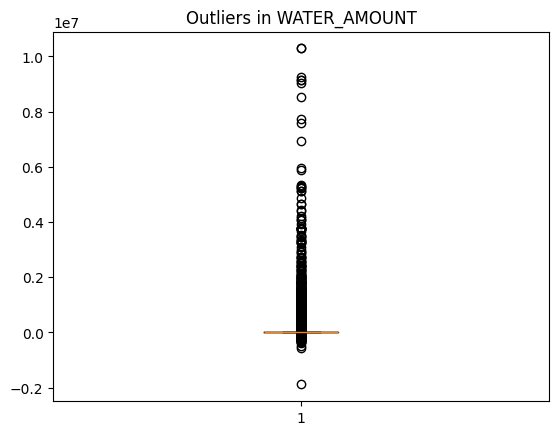

In [32]:
import matplotlib.pyplot as plt

combined_df["WATER_AMOUNT"] = pd.to_numeric(
    combined_df["WATER_AMOUNT"], errors="coerce"
)
# Replace NaN with 0
combined_df["WATER_AMOUNT"] = combined_df["WATER_AMOUNT"].fillna(0)



plt.boxplot(combined_df["WATER_AMOUNT"].dropna())
plt.title("Outliers in WATER_AMOUNT")
plt.show()


## Data Preparation

### Filtering the highest water consumers

In [29]:
top_consumers = combined_df.sort_values(by="WATER_AMOUNT", ascending=False).head(30)
top_consumers[["INSTALLATION_KEY", "REGION", "ZONE", "WATER_AMOUNT", "BILL_AMOUNT","INSTALLATION_TYPE_DESC"]]


,INSTALLATION_KEY,REGION,ZONE,WATER_AMOUNT,BILL_AMOUNT,INSTALLATION_TYPE_DESC
247731,IN-1000374,KASARANI,DANDORA,10285025.0,17226200.0,INDUSTRIAL
740538,CV-7000374,REGION,DANDORA,10284225.0,17224896.0,INDUSTRIAL
2265958,CV-7000374,KASARANI,NGUMBA- MWIKI,9245950.0,15485896.0,INDUSTRIAL
1233580,CV-7000374,KASARANI,NGUMBA- MWIKI,9151550.0,15327776.0,INDUSTRIAL
426,CV-7000374,KASARANI,DANDORA,9138908.0,15306743.0,INDUSTRIAL
2019444,CV-7000374,KASARANI,NGUMBA- MWIKI,9037150.0,15136120.0,INDUSTRIAL
1140033,CV-7000374,KASARANI,DANDORA,8531550.0,14289240.0,INDUSTRIAL
2317124,CV-7103973,LOWER EMBAKASI,NYAYO,7717027.0,12924806.0,COMMERCIAL
1773421,CV-7000374,KASARANI,NGUMBA- MWIKI,7585198.0,12704178.0,INDUSTRIAL
1332514,CV-7103973,LOWER EMBAKASI,NYAYO,6933827.0,11612982.0,COMMERCIAL


### Feature Engineering 

#### 1. Location-based Features
- Encode `REGION`, `ZONE`, and `SUB_ZONE` to capture spatial variation.  
- Aggregate average bill amounts and water volumes per zone/sub-zone.  
- Compute zone density (number of customers/meters per zone).  

#### 2. Installation Features
- Group installation types (`INST_TYPE_CODE`, `INSTALLATION_TYPE_DESC`).  
- Compute activity frequency per `INSTALLATION_KEY`.  
- Aggregate unique customers and average consumption per installation.  

#### 3. Meter Information
- Categorize meter sizes (small/medium/large).  
- Normalize consumption by meter size.  
- Flag anomalies (e.g., unusually high volume on small meters).  

#### 4. Billing Information
- Extract time-based features from `BILL_DATE`: year, month, quarter, season.  
- Compute billing frequency per customer (using `BILL_DATE` differences).  

#### 5. Bill Quality
- Create binary flag for **estimated bills** (`BILL_ESTIMATE_ACTUAL`).  
- Compute ratio of estimated bills per customer/zone.  

#### 6. Charges & Consumption
- Derive unit cost:  
  - `water_unit_cost = WATER_AMOUNT / BILL_VOLUME`  
- Proportion features:  
  - `sewer_ratio = SEWER_AMOUNT / BILL_AMOUNT`  
- Total service cost: `WATER_AMOUNT + SEWER_AMOUNT`.  
- High vs low usage clusters (based on `BILL_VOLUME` and `BILL_AMOUNT`).  

#### 7.  Advanced Cross-Features
- Region × season interactions (zone-level consumption patterns).  
- Meter size × volume (spotting mismatches).  
- Estimate flag × billing patterns (detecting unreliable billing).  
- Customer stability score (variance of bills per `INSTALLATION_KEY`).  

---

With these engineered features, we capture **location, billing reliability, customer behavior, and consumption anomalies**, even without the dropped columns.  
This ensures NCWSC can still identify **zones and customer groups with the highest water losses** and prioritize smart meter installations effectively.


In [36]:
import pandas as pd

def feature_engineering(df):
    # 1. Location Features
    # Aggregations per zone/sub-zone
    if "ZONE" in df.columns:
        zone_agg = df.groupby("ZONE")["BILL_AMOUNT"].mean().rename("avg_bill_per_zone")
        df = df.merge(zone_agg, on="ZONE", how="left")

    if "SUB_ZONE" in df.columns:
        subzone_agg = df.groupby("SUB_ZONE")["BILL_AMOUNT"].mean().rename("avg_bill_per_subzone")
        df = df.merge(subzone_agg, on="SUB_ZONE", how="left")

    # Zone density (number of meters per zone)
    if "ZONE" in df.columns and "INSTALLATION_KEY" in df.columns:
        zone_density = df.groupby("ZONE")["INSTALLATION_KEY"].nunique().rename("zone_density")
        df = df.merge(zone_density, on="ZONE", how="left")

    # Encode REGION, ZONE, SUB_ZONE (after aggregations)
    for col in ["REGION", "ZONE", "SUB_ZONE"]:
        if col in df.columns:
            df = pd.get_dummies(df, columns=[col], drop_first=True)

    # 2. Installation Features
    if "INSTALLATION_KEY" in df.columns:
        # Frequency of activity per installation
        install_freq = df.groupby("INSTALLATION_KEY")["BILL_DATE"].count().rename("install_freq")
        df = df.merge(install_freq, on="INSTALLATION_KEY", how="left")

        # Average consumption per installation
        avg_cons = df.groupby("INSTALLATION_KEY")["BILL_VOLUME"].mean().rename("avg_volume_per_install")
        df = df.merge(avg_cons, on="INSTALLATION_KEY", how="left")

    # 3. Meter Features
    if "METER_SIZE" in df.columns:
        try:
            df["meter_size_category"] = pd.qcut(
                df["METER_SIZE"], q=3, labels=["small", "medium", "large"], duplicates="drop"
            )
        except ValueError:
            # fallback: if very few unique sizes, just use raw categories
            df["meter_size_category"] = df["METER_SIZE"].astype(str)


    # 4. Billing Features
    if "BILL_DATE" in df.columns:
        df["bill_year"] = pd.to_datetime(df["BILL_DATE"]).dt.year
        df["bill_month"] = pd.to_datetime(df["BILL_DATE"]).dt.month
        df["bill_quarter"] = pd.to_datetime(df["BILL_DATE"]).dt.quarter

    # 5. Bill Quality Features
    if "BILL_ESTIMATE_ACTUAL" in df.columns:
        df["is_estimate"] = df["BILL_ESTIMATE_ACTUAL"].apply(lambda x: 1 if x == "ESTIMATE" else 0)

    # 6. Charge Features
    if "BILL_VOLUME" in df.columns and "WATER_AMOUNT" in df.columns:
        df["water_unit_cost"] = df["WATER_AMOUNT"] / df["BILL_VOLUME"].replace(0, pd.NA)

    if "SEWER_AMOUNT" in df.columns and "BILL_VOLUME" in df.columns:
        df["sewer_unit_cost"] = df["SEWER_AMOUNT"] / df["BILL_VOLUME"].replace(0, pd.NA)

    if "SEWER_AMOUNT" in df.columns and "BILL_AMOUNT" in df.columns:
        df["sewer_ratio"] = df["SEWER_AMOUNT"] / df["BILL_AMOUNT"].replace(0, pd.NA)

    if "BILL_VOLUME" in df.columns and "BILL_DATE" in df.columns:
        # Consumption per day (approximate if BILL_DAYS is missing)
        df["consumption_per_day"] = df["BILL_VOLUME"] / 30  

    return df



engineered_df = feature_engineering(combined_df)
print(engineered_df.head())


C:\Users\User\AppData\Local\Temp\ipykernel_31944\852110846.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zone_agg = df.groupby("ZONE")["BILL_AMOUNT"].mean().rename("avg_bill_per_zone")
C:\Users\User\AppData\Local\Temp\ipykernel_31944\852110846.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subzone_agg = df.groupby("SUB_ZONE")["BILL_AMOUNT"].mean().rename("avg_bill_per_subzone")
C:\Users\User\AppData\Local\Temp\ipykernel_31944\852110846.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

  INSTALLATION_KEY INST_TYPE_CODE INSTALLATION_TYPE_DESC  METER_SIZE  \
0       CV-7000001            DOM               DOMESTIC         0.5   
1       CV-7000004            DOM               DOMESTIC         0.5   
2       CV-7000005            DOM               DOMESTIC         0.5   
3       CV-7000006            DOM               DOMESTIC         0.5   
4       CV-7000008            DOM               DOMESTIC         0.5   

   BILL_DATE BILL_ESTIMATE_ACTUAL MAIN_SERVICE SHADOW_SERVICE  WATER_AMOUNT  \
0 2024-08-09               ACTUAL          WAT            SEW          90.0   
1 2024-08-14               ACTUAL          WAT            SEW         315.0   
2 2024-08-05               ACTUAL          WAT            SEW        2860.0   
3 2024-08-05               ACTUAL          WAT            SEW          90.0   
4 2024-08-02               ACTUAL          WAT            SEW          90.0   

   SEWER_AMOUNT  ...  avg_volume_per_install  meter_size_category  bill_year  \
0          8